# This notebook will show you how to use the **BuildAmberSystems** class

Please refer to the documentation whilst following this tutorial.

The first thing to do is import the required modules - **sw_directories** and **sw_build_systems**.

In [1]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

Now we need to initialise an instance of the **BuildAmberSystems** class and a prerequisite of this is an instance of the **SnippetSimManage** class.

In [2]:
manager = SnippetSimManage(os.getcwd())
builder = BuildAmberSystems(manager)

From tutorial 2, you would have generated a caffeine pdb file. The first thing we can do with build systems is parameterize it.

We need two functions for this:

- builder.gen_ac_file
- builder.parameterize_mol

The first will generate the charges for each atom in the caffeine molecule and the second will generate it parameters for amber.

In [3]:
# Generate and assign charges to each atom
ac_file = builder.gen_ac_file("caffeine")
print(ac_file)

/home/dan/polymersimulator/pdb_files/molecules/caffeine/caffeine.ac


Now we can parameterize the molecule

In [4]:
# Parameterize caffeine
builder.parameterize_mol("caffeine")

FileNotFoundError: [Errno 2] No such file or directory: '/home/dan/polymersimulator/pdb_files/caffeine.pdb'

In [5]:
# Check if it was parameterized properly - if yes == True, if no == False
param = builder.is_mol_parametrized("caffeine")
print(param)

True


### Generating amber parameters for simulation - small molecule

Now it is time to generate parameters of caffeine for a molecular dynamics simulation

In [6]:
# Generate parameters for simulation of a single molecule
system_name = builder.gen_amber_params_sing_mol("caffeine")
print(system_name)

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source /home/dan/polymersimulator/pdb_files/systems/caffeine_sing_mol/caffeine_sing_mol.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: /home/dan/polymersimulator/pdb_files/systems/caffeine_sing_mol/caffeine_sing_mol.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.wa

Now check if the files for amber exist

In [7]:
# Load topology and coordinate files
top, coord = manager.load_amber_filepaths(system_name)
print(top, coord)

/home/dan/polymersimulator/pdb_files/systems/caffeine_sing_mol/caffeine_sing_mol.prmtop /home/dan/polymersimulator/pdb_files/systems/caffeine_sing_mol/caffeine_sing_mol.rst7


### Generating amber parameters for simulation - solvated small molecule (water)

Now it is time to generate parameters of solvated caffeine for a molecular dynamics simulation - as long as the caffeine molecule has been parametreized these methdos will work.

In [8]:
# Solvate a caffeine molecule in water with no buffer
system_name = builder.gen_amber_params_sing_mol_solvated("caffeine")
print(system_name)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/caffeine
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source caffeine_wat_solv_10.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./caffeine_wat_solv_10.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda

In [9]:
# Solvate a caffeine molecule in water with a buffer of 10 angstroms
system_name = builder.gen_amber_params_sing_mol_solvated("caffeine", 10)
print(system_name)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/caffeine
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source caffeine_wat_solv_10.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./caffeine_wat_solv_10.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda

### Building polymers

Here is the example functions for building polymers from the documentation.

The first step is to generate a pdb file from the SMILES of the trimer of the moelcule. For this example, 3HB_trimer will be used.

The idea here is to start with the trimer and cut it into a **head**, **mainchain** and **tail** unit. From these units, a polymer of any length can then be generated.

In [11]:
# Generate base trimer and assign a rescode
pdb_file = builder.SmilesToPDB_GenResCode("OC(C)CC(=O)OC(C)CC(=O)OC(C)CC(=O)O", "3HB_trimer")
print(pdb_file)

/home/dan/polymersimulator/pdb_files/3HB_trimer.pdb


Then to parameterize this trimer, the same steps as were carried out for caffeine are followed. 

1. Gen .ac file
2. Parameterize mol

In [ ]:
# Generate .ac file and parameterize trimer
ac_file = builder.gen_ac_file("3HB_trimer")
print(ac_file)
builder.parameterize_mol("3HB_trimer")

Then residue codes need to be generated for each polymeric unit (head, mainchain and tail) before generating the individual files for each unit.

In [12]:
# Generate residue codes for polymeric units
builder.GenRescode_4_PolyUnits("3HB_trimer")

Head code assigned:  hAD
Mainchain code assigned:  mAD
Tail code assigned:  tAD


Then a .txt file for each unit (head_3HB_trimer.txt, mainchain_3HB_trimer.txt and tail_3HB_trimer.txt) needs to be saved in the 3HB_trimer molecule directory (**/home/pdb_files/molecules/3HB_trimer**). 
A more detailed explanation will come as to what these text files contain, but they denote waht atoms make up each unit and examples for these files can be found in the appropriate location in the github repository.

In [ ]:
# Generate polymeric units of the trimer
builder.gen_prepin_files("3HB_trimer")

Once this code has run with no errors (it is likely you will get some the first time) the polymer can be built.

In [13]:
# Build a decamer
pdb = builder.gen_polymer_pdb("3HB_trimer", 10)
print(pdb)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/Amb

In [3]:
# Generate parameters for a polymer
system_name = builder.gen_amber_params_sing_poly("3HB_trimer", "3HB_10_polymer")

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_sing_poly/3HB_10_polymer_sing_poly.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_sing_poly/3HB_10_polymer_sing_poly.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTo

### Building polymer systems

Now a polymer is parameterized systems can be built that contain multiple polymers so bulk properties can be investigated.

There are a few options for constructing systems of polymers; currently:

1. Option for number of polymers (3x3 array or 5x5 array)
2. Option for **crystalline** or **random** arrays of polymers

In [3]:
# Build a 5x5 crystalline array of the 3HB decamer
system_name = builder.generate_polymer_5_5_array("3HB_trimer", "3HB_10_polymer", "crystal")
print(system_name)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
3HB_10_polymer_5_5_array_crystal.intleap
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer_5_5_array_crystal.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer_5_5_array_crystal.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools2

In [4]:
# Build a 5x5 crystalline array of the 3HB decamer
system_name = builder.generate_polymer_5_5_array("3HB_trimer", "3HB_10_polymer", "random")
print(system_name)

*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found '  ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

Output: 
################################################################################

 PACKMOL - Packing optimization for the automated generation of
 starting configurations for molecular dynamics simulations.
 
                                                              Version 20.14.4 

################################################################################

  Packmol must be run with: packmol < inputfile.inp 

  Userguide at: http://m3g.iqm.unicamp.br/packmol 

  Reading input file... (Control-C aborts)
  Types of coordinate files specified: pdb
  Seed for random number generator:      1234567
  Output file: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_5_5_array_random/3HB_10_polymer_5_5_array_random.pdb
  Reading coordinate file: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.pdb
  Number of independent structures:            1
  The structures are: 
  Structure            1 :/home/dan/polymersimulator/pdb_files/systems/3H

If you want to retrieve the files for Amber, it is pretty easy and is as follows.

In [5]:
top, coord = manager.load_amber_filepaths(system_name)
print(f"The topology file for {system_name} is {top}")
print(f"The coordinate file for {system_name} is {coord}")

The topology file for 3HB_10_polymer_5_5_array_random is /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_5_5_array_random/3HB_10_polymer_5_5_array_random.prmtop
The coordinate file for 3HB_10_polymer_5_5_array_random is /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_5_5_array_random/3HB_10_polymer_5_5_array_random.rst7


# Building copolymers

Building copolymers is essentially the same as building a homopolymer. Except we must specifiy **2** or **3** polymers for a copolymer and a pattern.

Patterns explained:

For example, we could take a pattern to be something like **AB**, **ABC**, **AABB**, etc... However, the pattern must be matchable to our polymer length. 
By this I mean, for a copolymer of 10 units: **AB** works and will yield **ABABABABAB** but for **AABB** this wont work as our pattern is four units and the specified length ten. We must specify the pattern to be a factor of our desired polymer length.

It is also possible to specify a pattern as long as the unit number. By this I mean if you want to build a polymer of 10 units in a random patter from monomers **A**, **B** and **C** you can do that by manually inputting a pattern like **AABBCABCCA** and the code will be able to build a polymer with this pattern.

In [4]:
# Lets build a 3HV//3HB "AB" copolymer
system_name = builder.gen_copolymer_pdb("AB", ["3HV_trimer", "3HB_trimer"], 10)

3HV_3HB_10_copolymer_AB
{hDY mAD mDY mAD mDY mAD mDY mAD mDY tAD}
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_10_copolymer_AB/3HV_3HB_10_copolymer_AB.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_10_copolymer_AB/3HV_3HB_10_copolymer_AB.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1

In [5]:
top, coord = manager.load_amber_filepaths(system_name)
print(f"The topology file for {system_name} is {top}")
print(f"The coordinate file for {system_name} is {coord}")

The topology file for 3HV_3HB_10_copolymer_AB is /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_10_copolymer_AB/3HV_3HB_10_copolymer_AB.prmtop
The coordinate file for 3HV_3HB_10_copolymer_AB is /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_10_copolymer_AB/3HV_3HB_10_copolymer_AB.rst7


Now lets change the pattern to **ABBABB** and set the chain length to 12 (the pattern is 6 units long so we need a chan length multiple of 6)

In [6]:
# Lets build a 3HV//3HB "AB" copolymer
system_name = builder.gen_copolymer_pdb("ABBABB", ["3HV_trimer", "3HB_trimer"], 12)

3HV_3HB_12_copolymer_ABBABB
{hDY mAD mAD mDY mAD mAD mDY mAD mAD mDY mAD tAD}
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_12_copolymer_ABBABB/3HV_3HB_12_copolymer_ABBABB.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_12_copolymer_ABBABB/3HV_3HB_12_copolymer_ABBABB.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for 

In [8]:
top, coord = manager.load_amber_filepaths(system_name)
print(f"The topology file for {system_name} is {top}")
print(f"The coordinate file for {system_name} is {coord}")

The topology file for 3HV_3HB_12_copolymer_ABBABB is /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_12_copolymer_ABBABB/3HV_3HB_12_copolymer_ABBABB.prmtop
The coordinate file for 3HV_3HB_12_copolymer_ABBABB is /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_12_copolymer_ABBABB/3HV_3HB_12_copolymer_ABBABB.rst7


We can also build a copolymer with 3 different monomeric units - we will use the pattern **ABC**

In [9]:
# Lets build a 3HV//3HB "AB" copolymer
system_name = builder.gen_copolymer_pdb("ABC", ["3HV_trimer", "3HB_trimer", "5HV_trimer"], 12)

3HV_3HB_5HV_12_copolymer_ABC
{hDY mAD mDZ mDY mAD mDZ mDY mAD mDZ mDY mAD tDZ}
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_5HV_12_copolymer_ABC/3HV_3HB_5HV_12_copolymer_ABC.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_5HV_12_copolymer_ABC/3HV_3HB_5HV_12_copolymer_ABC.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field

In [10]:
top, coord = manager.load_amber_filepaths(system_name)
print(f"The topology file for {system_name} is {top}")
print(f"The coordinate file for {system_name} is {coord}")

The topology file for 3HV_3HB_5HV_12_copolymer_ABC is /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_5HV_12_copolymer_ABC/3HV_3HB_5HV_12_copolymer_ABC.prmtop
The coordinate file for 3HV_3HB_5HV_12_copolymer_ABC is /home/dan/polymersimulator/pdb_files/systems/3HV_3HB_5HV_12_copolymer_ABC/3HV_3HB_5HV_12_copolymer_ABC.rst7


### Generating amber parameters for simulation - solvated polymer (water)

Now it is time to generate parameters of the 3HB polymer generated previously for a molecular dynamics simulation.

In [3]:
system_name = builder.gen_amber_params_poly_solvated("3HB_trimer", "3HB_10_polymer")

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer_wat_solv_10.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer_wat_solv_10.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3 done
Loading 

This function is pretty simple and will output a system of the polymer that is solvated with a buffer of TIP3P water with a 10 angstrom buffer from the largest {x, y, z} bounds of
the polymer. It will look like this:

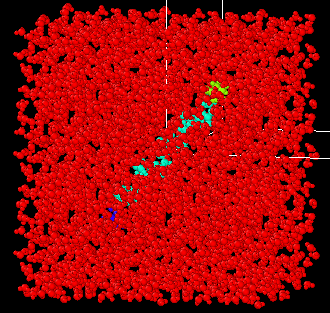

There are some additional things this function can do, like:

- Changing the water model
- Solvating with a larger buffer

When we ran the function above we were using a default buffer (10 angstroms) and default water model (TIP3P). The next example will show a solvated system with a buffer of 20 angstroms.
However, no different water models will be shown at the current time and if you would like more information on what water models you can use and how to implement this - please raise an issue.

**File naming** the output files will be named as so: **polymer_name_wat_solv_buffer.**

So, for a **3HB_10_polymer** the filenames for different implementations of this function will be:

- Default: 3HB_10_polymer_wat_solv_10
- 20 angstrom buffer: 3HB_10_polymer_wat_solv_20

In [4]:
system_name = builder.gen_amber_params_poly_solvated("3HB_trimer", "3HB_10_polymer", 20)

Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer_wat_solv_20.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer_wat_solv_20.intleap
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 2017)
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.water.fb3 done
Loading 

The system with a larger buffer will look like this:

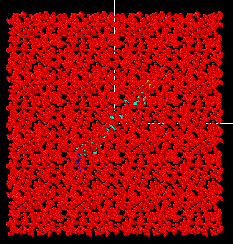